# Customer Churn Prediction

This is the first notebook for now, we will create smaller subnotebooks later. We are working with the dataset from https://www.kaggle.com/blastchar/telco-customer-churn. 

## Import libaries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
import sklearn

In [3]:
CHURN_PATH = "../data/"

data_path = CHURN_PATH + "customerChurnTelco.csv"

df = pd.read_csv(data_path)

**Preview of the data**

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Variables description

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


It seems that we should convert variable **TotalCharges** from Object into float64.

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**We can see total 21 variables and each varaible has 7043 observations.**

- Description of the variables:

    1. **customerID** is a unique identifying number assigned to each customer 
    
    2. **gender** indicates the sex of the custormer - Male or female
    
    3. **SeniorCitizen** indicates whether the customer is a senior citizen or not (1, 0)
    
    4. **Partner** indicates whether the customer has a partner or not (Yes, No)
    
    5. **Dependents** indicates whether the customer has dependents or not (Yes, No)

    6. **tenure** is the number of months the customer stayed with the company
    
    7. **PhoneService** indicates whether the customer has a phone service or not (Yes, No)
    
    8. **MultipleLines** indicates whether the customer has multiple lines or not (Yes, No, No phone service)
    
    9. **InternetService** indicates customer's internet service provider (DSL, Fiber optic, No)
    
    10. **OnlineSecurity** indicates whether the customer has online security or not (Yes, No, No internet service)
    
    11. **OnlineBackup** indicates whether the customer has online backup or not (Yes, No, No internet service)
    
    12. **DeviceProtection** indicates whether the customer has device protection or not (Yes, No, No internet service)
    
    13. **TechSupport** indicates whether the customer has tech support or not (Yes, No, No internet service)
    
    14. **StreamingTV** indicates whether the customer has streaming TV or not (Yes, No, No internet service)
    
    15. **StreamingMovies** indicates whether the customer has streaming movies or not (Yes, No, No internet service)
    
    16. **Contract** indicates the contract term of the customer (Month-to-month, One year, Two year)
    
    17. **PaperlessBilling** indicates whether the customer has paperless billing or not (Yes, No)
    
    18. **PaymentMethod** indicates the customer's  payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    
    19. **MonthlyCharges** is the customer's amount of monthly charges
    
    20. **TotalCharges** is the amount charged to the customer totally
    
    21. **Churn** indicates whether the customer churned or not (Yes or No)
    
**Here, we have that Churn is the target variable and rest of the variables are predictor variables.**

### Categorical and Numerical Variables

In [9]:
display(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

**Categorical Variable:**  gender, SeniorCitizen, Partner, Dependent, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn, customerID.

**Numerical Variable**: tenure, MonthlyCharges, TotalCharges.

**Let us check whether any of the features contains  blank, null or empty values**

In [10]:
display(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We observe that just **TotalCharges** contains null values.

Lazar's suggestion of the preprocessing:

1.  Univariate analysis of the fatures 
2.  Feature engineering:  modify or create new features from the exsisting features which are otherwise hard to analyse in their raw forms that we saw in Univariate Analysis section
3. Outliers detection and Imputing missing variables
4. Bivaraite and Multivariate analysis
5. Data Transfromation -  categorical variables will be encoded into numerical variables, maybe some categorization or maybe normalization and standardization of our continuous variables and redundant and useless features will be dropped

## Univariate analysis

We are going to explore the distribution and central tendency of the values of each variable separately in the data set. For numerical variables, we are going to use histogram to explore their shape of distribution, while for categorical varaibles we are going to use bar plots and pie charts to picture the absolute and relative frequency distribution.

### Numerical variables

In [11]:
def showSummary(variable):
    stats = variable.describe()
    skewness = pd.Series(variable.skew(), index=["skewness"])
    stats = pd.DataFrame(pd.concat([skewness, stats]), columns=[variable.name]).reset_index().rename(
        columns={"index":"Summary stats"})

    return display(stats.round(2))

**Tenure**

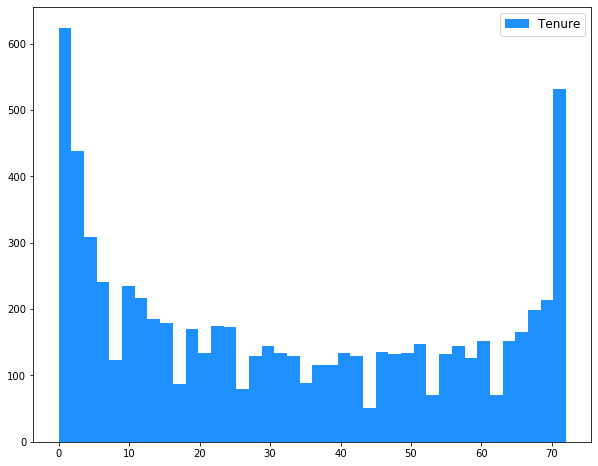

In [12]:
ax = df["tenure"].hist(bins=40, color="DodgerBlue", label="Tenure", figsize=(10, 8), grid=False)
ax.legend(fontsize=12);

In [13]:
showSummary(df["tenure"])

,Summary stats,tenure
0,skewness,0.24
1,count,7043.00
2,mean,32.37
3,std,24.56
4,min,0.00
5,25%,9.00
6,50%,29.00
7,75%,55.00
8,max,72.00


Plot shows that distribution of values of variable **tenure** is almost symmetric where we have mass of the distribution heavily concentrated on the left and on the right side. This is confirmed by the value of `skewness=0.24`

**MonthlyCharges**

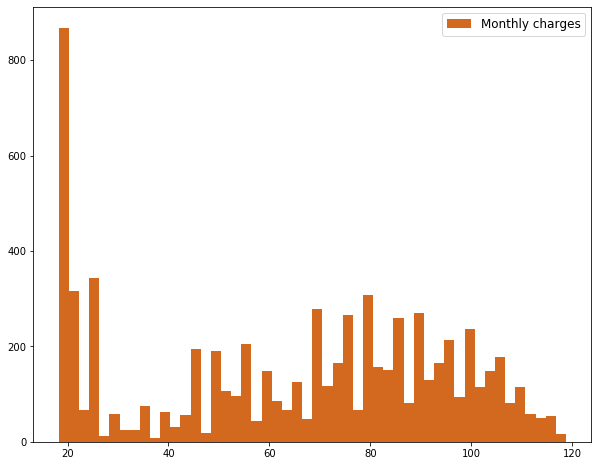

In [14]:
ax = df["MonthlyCharges"].hist(bins=50, color="chocolate", label="Monthly charges", figsize=(10, 8), grid=False)
ax.legend(fontsize=12);

In [15]:
showSummary(df["MonthlyCharges"])

,Summary stats,MonthlyCharges
0,skewness,-0.22
1,count,7043.00
2,mean,64.76
3,std,30.09
4,min,18.25
5,25%,35.50
6,50%,70.35
7,75%,89.85
8,max,118.75


Comments?

**TotalCharges**

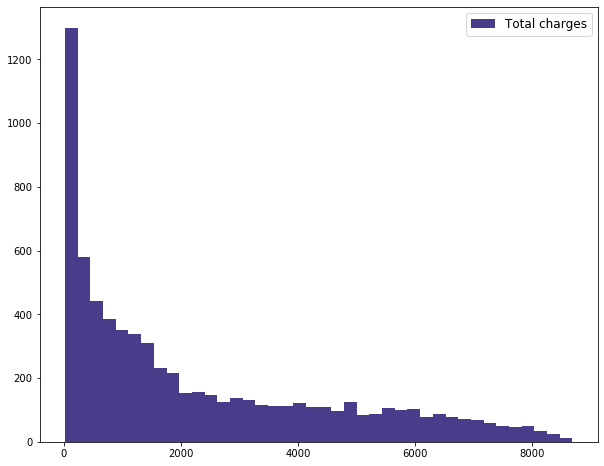

In [16]:
ax = df["TotalCharges"].hist(bins=40, color="DarkSlateBlue", label="Total charges", figsize=(10, 8), grid=False)
ax.legend(fontsize=12);

In [17]:
showSummary(df["TotalCharges"])

,Summary stats,TotalCharges
0,skewness,0.96
1,count,7032.00
2,mean,2283.30
3,std,2266.77
4,min,18.80
5,25%,401.45
6,50%,1397.48
7,75%,3794.74
8,max,8684.80


Histogram shows that the  mass of the distribution of **TotalCharges** is concentrated on the left of the figure due to very long tail on the right side. We can say that **TotalCharges** is moderately  skewed(positively) which is also supported by the value of skewness of 0.96.

### Categorical Variables

In [24]:
def plotFrequency(variable):
    absFreq = df[variable].value_counts()
    colors = ['SteelBlue', 'DarkOrange', 'DarkCyan']
    
    fig=plt.figure(figsize=(10, 5))    
    plt.barh(absFreq.index, absFreq, color=colors)
    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.ylabel(variable, fontsize=15)
    plt.title("Absolute frequncy", fontsize=15)
    plt.show()
    
    fig=plt.figure(figsize=(6, 6))
    plt.pie(absFreq, labels=absFreq.index, textprops={"fontsize":14}, autopct="%0.2f%%", 
            colors=colors)
    plt.title("Relative frequency", fontsize=15)
    plt.show();

**Churn**

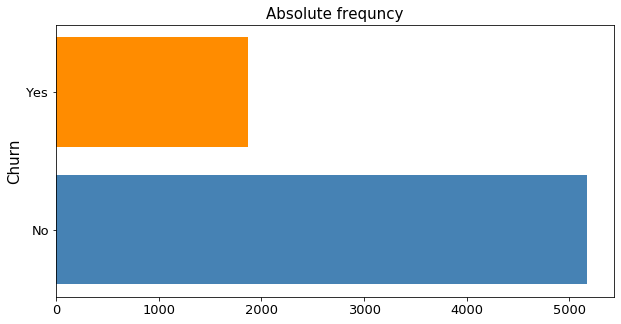

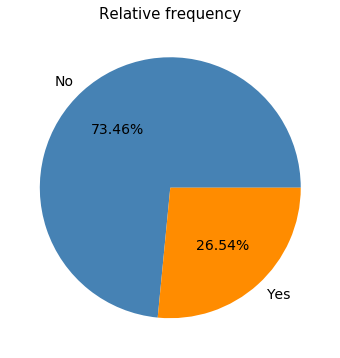

In [25]:
plotFrequency("Churn");

Comments?

**Gender**

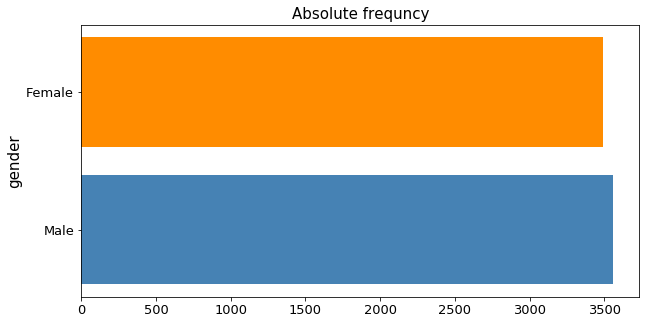

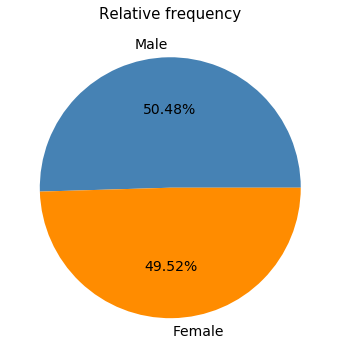

In [26]:
plotFrequency("gender")

Comments?